In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [ ]:
train=pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.drop(labels='Id',axis=1,inplace=True)

In [ ]:
# missing values count
N_columns=[]
for i in train.columns:
    x=np.round(train[i].isnull().mean()*100,2)
    if x>50:
      print(i+' : ' + str(x)+ ' %')
    elif x>0:
      N_columns.append(i)

train.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'],inplace=True) # Dropping columns which have missing values more than 80%
#print(N_columns)
len(N_columns)

Alley : 93.77 %
PoolQC : 99.52 %
Fence : 80.75 %
MiscFeature : 96.3 %


15

In [ ]:
#fill NAN values
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['MasVnrType']=train['MasVnrType'].fillna('None')
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode().values[0])
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode().values[0])
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode().values[0])
train['BsmtFinType1']=train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode().values[0])
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode().values[0])
train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode().values[0])
train['FireplaceQu']=train['FireplaceQu'].fillna('None')
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode().values[0])
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode().values[0])
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode().values[0])
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode().values[0])

In [ ]:
# Handling Temporal train
year=train[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']]
year.corr() # Checking for time based train correlation
#Feature Engineering
train['YearBuilt_age']=train['YrSold']-train['YearBuilt'] #converting Year time interms of age of built train
train['YearRemodAdd_age']=train['YrSold']-train['YearRemodAdd'] #converting Remodling Year time interms of age of remodelling train
train.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt'],inplace=True)   #Dropping GarageYrBlt as highly correlated with  Year Built and other columns as converted to int variables

In [ ]:
#Classifying the features based train type
Numerical=[]
Categorical=[]
for i in train.columns:
  # if i not in year:
    if train[i].dtype=='O':
      Categorical.append(i)
    elif i =='YrSold':
      Categorical.append(i)
    elif train[i].dtype!='O':
      Numerical.append(i)

print(Numerical)
print('\n')
print(Categorical)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'YearBuilt_age', 'YearRemodAdd_age']


['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedD

#Test Data

In [ ]:
test=pd.read_csv('test.csv')
test_Id=test['Id']
test.drop(labels='Id',axis=1,inplace=True)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# missing values count in Test train
N_columns_test=[]
for i in test.columns:
    x=np.round(test[i].isnull().mean()*100,2)
    if x>50:
      print(i+' : ' + str(x)+ ' %')
    elif x>0:
      N_columns_test.append(i)

test.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'],inplace=True) # Dropping columns which have missing values more than 80%
len(N_columns_test)

Alley : 92.67 %
FireplaceQu : 50.03 %
PoolQC : 99.79 %
Fence : 80.12 %
MiscFeature : 96.5 %


28

In [ ]:
test['MSZoning']=test['MSZoning'].fillna(train['MSZoning'].mode().values[0])
test['LotFrontage']=test['LotFrontage'].fillna(train['LotFrontage'].mean())
test['Utilities']=test['Utilities'].fillna(train['Utilities'].mode().values[0])
test['Exterior1st']=test['Exterior1st'].fillna(train['Exterior1st'].mode().values[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(train['Exterior2nd'].mode().values[0])
test['MasVnrType']=test['MasVnrType'].fillna('None')
test['MasVnrArea']=test['MasVnrArea'].fillna(train['MasVnrArea'].mean())
test['BsmtQual']=test['BsmtQual'].fillna(train['BsmtQual'].mode().values[0])
test['BsmtCond']=test['BsmtCond'].fillna(train['BsmtCond'].mode().values[0])
test['BsmtExposure']=test['BsmtExposure'].fillna(train['BsmtExposure'].mode().values[0])
test['BsmtFinType1']=test['BsmtFinType1'].fillna(train['BsmtFinType1'].mode().values[0])
test['BsmtFinType2']=test['BsmtFinType2'].fillna(train['BsmtFinType2'].mode().values[0])
test['Electrical']=test['Electrical'].fillna(train['Electrical'].mode().values[0])
test['FireplaceQu']=test['FireplaceQu'].fillna('None')
test['GarageType']=test['GarageType'].fillna(train['GarageType'].mode().values[0])
test['GarageFinish']=test['GarageFinish'].fillna(train['GarageFinish'].mode().values[0])
test['GarageQual']=test['GarageQual'].fillna(train['GarageQual'].mode().values[0])
test['GarageCond']=test['GarageCond'].fillna(train['GarageCond'].mode().values[0])
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(train['BsmtFinSF1'].mean())
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(train['BsmtFinSF2'].mean())
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(train['BsmtUnfSF'].mean())
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(train['TotalBsmtSF'].mean())
test['BsmtFullBath']=test['BsmtFullBath'].fillna(train['BsmtFullBath'].mean())
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(train['BsmtHalfBath'].mean())
test['KitchenQual']=test['KitchenQual'].fillna(train['KitchenQual'].mode().values[0])
test['Functional']=test['Functional'].fillna(train['Functional'].mode().values[0])
test['SaleType']=test['SaleType'].fillna(train['SaleType'].mode().values[0])
test['GarageCars']=test['GarageCars'].fillna(train['GarageCars'].mean())
test['GarageArea']=test['GarageArea'].fillna(train['GarageArea'].mean())

In [ ]:
# Handling Temporal Data
year=test[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']]
year.corr() # Checking for time based data correlation
#Feature Engineering
test['YearBuilt_age']=test['YrSold']-test['YearBuilt'] #converting Year time interms of age of built data
test['YearRemodAdd_age']=test['YrSold']-test['YearRemodAdd'] #converting Remodling Year time interms of age of remodelling data
test.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt'],inplace=True)   #Dropping GarageYrBlt as highly correlated with  Year Built and other columns as converted to int variables

In [ ]:
#Classifying the features based data type
Numerical_t=[]
Categorical_t=[]
for i in test.columns:
  # if i not in year:
    if test[i].dtype=='O':
      Categorical_t.append(i)
    elif i =='YrSold':
      Categorical_t.append(i)
    elif test[i].dtype!='O':
      Numerical_t.append(i)

print(Numerical_t)
print('\n')
print(Categorical_t)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YearBuilt_age', 'YearRemodAdd_age']


['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'YrSol

#Categorical Data

In [ ]:
Categorical_total=pd.concat([train[Categorical],test[Categorical_t]])

In [ ]:
Categorical_encode=Categorical_total[Categorical].apply(LabelEncoder().fit_transform)
Categorical_encode

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,YrSold,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,3,1,1,4,4,2,2,8,4
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,5,1,1,4,4,2,1,8,4
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,5,1,1,4,4,2,2,8,4
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,0,8,0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,5,1,1,4,4,2,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1,3,3,0,4,0,10,2,2,3,5,1,1,5,5,2,3,4,1,3,3,3,5,5,1,2,1,4,3,6,3,1,2,4,4,2,0,8,4
1455,4,1,3,3,0,4,0,10,2,2,4,5,1,1,5,5,2,3,4,1,3,3,3,4,5,1,4,1,4,3,6,3,4,2,4,4,2,0,8,0
1456,3,1,3,3,0,4,0,11,2,2,0,2,1,1,12,13,2,3,4,1,3,3,3,0,5,1,0,1,4,3,6,5,5,2,4,4,2,0,8,0
1457,3,1,3,3,0,4,0,11,2,2,0,6,1,1,6,15,2,3,4,2,2,3,0,2,5,1,4,1,4,3,6,3,1,2,4,4,2,0,8,4


In [ ]:

X=pd.concat([train[Numerical],Categorical_encode.iloc[:1460,:]],axis=1)
X.shape

(1460, 75)

In [ ]:
X=X.drop(columns='SalePrice')
Y=train['SalePrice']

In [ ]:
RF=RandomForestRegressor()
RF.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
grid_param = { 'n_estimators':[5,10,100,500,1000,2000],'criterion': ['mse'],
    'max_depth' : range(2,21,2),
    'min_samples_split': range(2,10,2),
    }

In [ ]:
grid_search = GridSearchCV(estimator=RF,   param_grid=grid_param,    cv=5,       n_jobs =-1)

In [ ]:
grid_search.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'mse', 'max_depth': 16, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
RF=RandomForestRegressor(criterion= 'mse', max_depth= 16, min_samples_split= 2,n_estimators=100)
RF.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
train_predict=RF.predict(X)

In [ ]:
mean_squared_error(Y,train_predict)

121429836.25257368

In [ ]:
np.sqrt(mean_squared_error(np.log(Y),np.log(train_predict)))

0.05927197655209464

In [ ]:
X_test=pd.concat([test[Numerical_t],Categorical_encode.iloc[1460:,:]],axis=1)
X_test.shape

(1459, 74)

In [ ]:
test_predict=RF.predict(X_test)
test_predict

array([125767.36849613, 154903.09333333, 180335.25738095, ...,
       153085.56606061, 116903.62726891, 228842.9269697 ])

In [ ]:
Test_SalePrice=pd.DataFrame()
Test_SalePrice['Id']=test_Id
Test_SalePrice['SalePrice']=test_predict

In [ ]:
Test_SalePrice

,Id,SalePrice
0,1461,125767.368496
1,1462,154903.093333
2,1463,180335.257381
3,1464,179159.681684
4,1465,196098.549770
...,...,...
1454,2915,86122.787799
1455,2916,86872.152431
1456,2917,153085.566061
1457,2918,116903.627269


In [ ]:
Test_SalePrice.to_csv('SalePrice_RForest.csv',index=False)

In [ ]:
feature_importance = RF.feature_importances_
feature_importance

array([1.91066672e-03, 6.39327520e-03, 1.33130332e-02, 5.83717465e-01,
       4.31944599e-03, 5.90391400e-03, 2.68307766e-02, 5.57127489e-04,
       5.31756808e-03, 3.89540647e-02, 1.57143725e-02, 3.54851324e-02,
       2.34398410e-04, 1.08209166e-01, 1.06715820e-03, 4.13140290e-04,
       8.34413876e-03, 1.00500920e-03, 1.83562253e-03, 7.20337030e-04,
       5.83956495e-03, 3.59046212e-03, 2.86428566e-02, 1.61858198e-02,
       5.81525539e-03, 5.19230871e-03, 6.63824729e-04, 3.60113605e-04,
       1.01018585e-03, 7.67047612e-04, 7.17182952e-05, 3.32099642e-03,
       9.77168723e-03, 6.02135950e-03, 1.60726965e-03, 6.96778441e-06,
       1.29412903e-03, 1.19301792e-03, 4.89454953e-07, 8.18163910e-04,
       6.56363968e-04, 7.10575778e-03, 5.00550943e-04, 2.16840065e-05,
       2.27356819e-04, 6.57885586e-04, 8.54677845e-04, 7.34072902e-04,
       2.01126007e-03, 1.18345676e-03, 1.07307143e-03, 3.04396778e-03,
       4.16818134e-04, 5.53971127e-04, 3.38873743e-03, 3.51586252e-04,
      

In [ ]:
# summarize feature importance
for i,v in enumerate(feature_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00191
Feature: 1, Score: 0.00639
Feature: 2, Score: 0.01331
Feature: 3, Score: 0.58372
Feature: 4, Score: 0.00432
Feature: 5, Score: 0.00590
Feature: 6, Score: 0.02683
Feature: 7, Score: 0.00056
Feature: 8, Score: 0.00532
Feature: 9, Score: 0.03895
Feature: 10, Score: 0.01571
Feature: 11, Score: 0.03549
Feature: 12, Score: 0.00023
Feature: 13, Score: 0.10821
Feature: 14, Score: 0.00107
Feature: 15, Score: 0.00041
Feature: 16, Score: 0.00834
Feature: 17, Score: 0.00101
Feature: 18, Score: 0.00184
Feature: 19, Score: 0.00072
Feature: 20, Score: 0.00584
Feature: 21, Score: 0.00359
Feature: 22, Score: 0.02864
Feature: 23, Score: 0.01619
Feature: 24, Score: 0.00582
Feature: 25, Score: 0.00519
Feature: 26, Score: 0.00066
Feature: 27, Score: 0.00036
Feature: 28, Score: 0.00101
Feature: 29, Score: 0.00077
Feature: 30, Score: 0.00007
Feature: 31, Score: 0.00332
Feature: 32, Score: 0.00977
Feature: 33, Score: 0.00602
Feature: 34, Score: 0.00161
Feature: 35, Score: 0.00001
Fe

In [ ]:
indices=np.argsort(feature_importance)[::-1]
indices
  32, 61, 50, 19,  8, 66,  2,
       16,  4, 51, 33, 31, 24, 67, 56, 17, 34, 25, 26, 64, 63, 49, 40,
       20, 68, 54, 70,  5, 36, 71, 65, 57,  0, 18, 60, 52, 72, 21, 58, 28,
       37, 48, 45, 39, 30, 69, 29, 62, 27, 59,  46, 53, 12, 42,
       14,

array([ 3, 13,  9, 11, 22,  6, 23, 10,  2, 32, 16, 41,  1, 33,  5, 20, 24,
        8, 25,  4, 61, 67, 21, 66, 54, 31, 51, 63, 48, 56,  0, 18, 57, 34,
       71, 36, 73, 37, 49, 65, 50, 14, 28, 17, 72, 46, 39, 60, 29, 47, 19,
       26, 45, 40,  7, 53, 64, 42, 52, 15, 27, 55, 70, 12, 44, 58, 68, 59,
       62, 69, 30, 43, 35, 38])

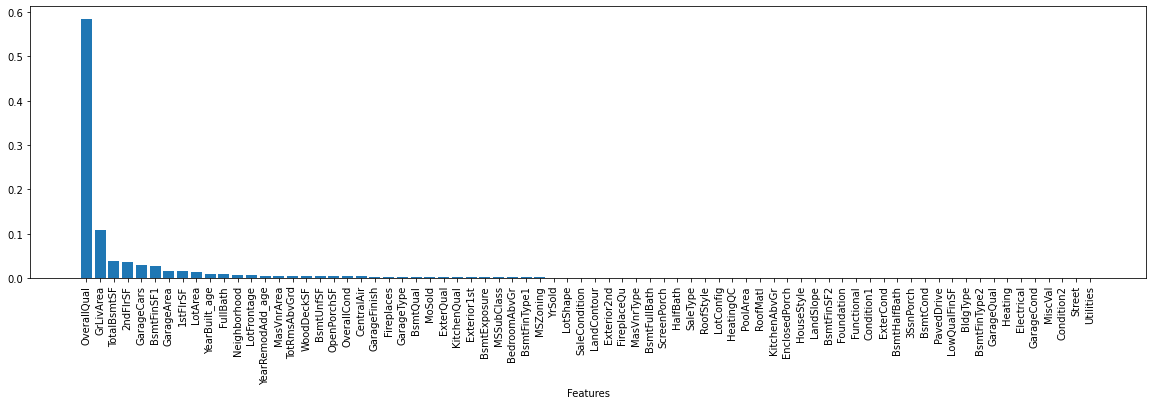

In [ ]:
# plot feature importance
plt.figure(figsize=[20,5])
plt.bar(X.columns[indices], feature_importance[indices])
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()